In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\DataSet\\more_preprocess.csv")
df

,Unnamed: 0,text,label
0,0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam
1,1,anies tepuk tangan riah jadi rektor wajib mata...,Politik
2,2,emang benar sih dukung anies dukung prabowo ha...,Demografi
3,3,waktu anies sikap kritis kerja bapak prabowo a...,Politik
4,4,anies baswedan harap asn masuk tni polri pegan...,Politik
...,...,...,...
4282,4578,ngeliat debat kemaren pas prabowo kicep kira k...,Politik
4283,4579,masyarakat yakin prabowo gibran milik visi jal...,Politik
4284,4580,imo both are irrational but satu jauh lebih ir...,Ekonomi
4285,4581,look at that bapak ganjar kecimpung lgislatif ...,Pertahanan dan Keamanan


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df['label_angka'] = df.label.map({
    'Politik' : 0,
    'Sosial Budaya'  : 1,
    'Ideologi' : 2,
    'Pertahanan dan Keamanan' : 3,
    'Ekonomi' : 4,
    'Sumber Daya Alam' : 5,
    'Demografi' : 6,
    'Geografi' : 7
})
df.head()

,text,label,label_angka
0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam,5
1,anies tepuk tangan riah jadi rektor wajib mata...,Politik,0
2,emang benar sih dukung anies dukung prabowo ha...,Demografi,6
3,waktu anies sikap kritis kerja bapak prabowo a...,Politik,0
4,anies baswedan harap asn masuk tni polri pegan...,Politik,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text,
    df.label_angka,
    test_size=0.2,
    random_state=42,
    stratify=df.label_angka
)

In [7]:
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score

# Definisikan fungsi untuk menghitung balanced accuracy
class BalancedAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name='balanced_accuracy', **kwargs):
        super(BalancedAccuracy, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.true_negatives = self.add_weight(name='tn', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=1)
        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.cast(y_pred, tf.int32)

        tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
        tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
        fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
        fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

        self.true_positives.assign_add(tp)
        self.true_negatives.assign_add(tn)
        self.false_positives.assign_add(fp)
        self.false_negatives.assign_add(fn)

    def result(self):
        sensitivity = self.true_positives / (self.true_positives + self.false_negatives)
        specificity = self.true_negatives / (self.true_negatives + self.false_positives)
        return (sensitivity + specificity) / 2

    def reset_states(self):
        self.true_positives.assign(0)
        self.true_negatives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

Epoch 1/10


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.1611 - loss: 10.375

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Balanced Accuracy: 0.19
574/574 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.1612 - loss: 10.3700 - val_accuracy: 0.0257 - val_loss: 2.5297 - val_balanced_accuracy: 0.1940
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.4209 - loss: 2.674
Balanced Accuracy: 0.35
574/574 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.4210 - loss: 2.6732 - val_accuracy: 0.1357 - val_loss: 3.2538 - val_balanced_accuracy: 0.3529
Epoch 3/10
  1/574 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.6875 - loss: 1.1451

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step ep - accuracy: 0.7257 - loss: 1.033
Balanced Accuracy: 0.40
574/574 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7259 - loss: 1.0321 - val_accuracy: 0.1789 - val_loss: 2.9687 - val_balanced_accuracy: 0.3989
Epoch 4/10
  1/574 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.7500 - loss: 0.5400

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.8396 - loss: 0.445
Balanced Accuracy: 0.38
574/574 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8397 - loss: 0.4456 - val_accuracy: 0.1848 - val_loss: 2.5403 - val_balanced_accuracy: 0.3803
Epoch 5/10
  1/574 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.8750 - loss: 0.2477

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.8592 - loss: 0.235
Balanced Accuracy: 0.40
574/574 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8592 - loss: 0.2356 - val_accuracy: 0.2070 - val_loss: 2.3996 - val_balanced_accuracy: 0.3966
Epoch 6/10
  1/574 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.8438 - loss: 0.3132

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.8765 - loss: 0.1
Balanced Accuracy: 0.39
574/574 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8765 - loss: 0.1552 - val_accuracy: 0.2596 - val_loss: 2.2232 - val_balanced_accuracy: 0.3936
Epoch 7/10
  1/574 ━━━━━━━━━━━━━━━━━━━━ 34s 60ms/step - accuracy: 0.9062 - loss: 0.1135

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - accuracy: 0.9002 - loss: 0.1
Balanced Accuracy: 0.41
574/574 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9002 - loss: 0.1055 - val_accuracy: 0.3263 - val_loss: 2.0696 - val_balanced_accuracy: 0.4067
Epoch 8/10


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.9146 - loss: 0.086
Balanced Accuracy: 0.41
574/574 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9147 - loss: 0.0867 - val_accuracy: 0.3895 - val_loss: 1.9180 - val_balanced_accuracy: 0.4078
Epoch 9/10
  1/574 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9688 - loss: 0.0593

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.9345 - loss: 0.0
Balanced Accuracy: 0.41
574/574 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9345 - loss: 0.0670 - val_accuracy: 0.4281 - val_loss: 1.8968 - val_balanced_accuracy: 0.4061
Epoch 10/10


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - accuracy: 0.9471 - loss: 0.050
Balanced Accuracy: 0.41
574/574 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9471 - loss: 0.0507 - val_accuracy: 0.4877 - val_loss: 1.8477 - val_balanced_accuracy: 0.4107


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_balanced_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.48      0.60       574
           1       0.23      0.47      0.31        80
           2       0.23      0.49      0.31        51
           3       0.38      0.57      0.45        53
           4       0.48      0.67      0.56        54
           5       0.21      0.43      0.28        28
           6       0.09      0.18      0.12        11
           7       0.00      0.00      0.00         4

    accuracy                           0.49       855
   macro avg       0.30      0.41      0.33       855
weighted avg       0.64      0.49      0.52       855

Balanced Accuracy: 0.41
Confusion Matrix:
 [[274 104  79  43  25  30  14   5]
 [ 26  38   3   3   3   6   1   0]
 [  7   4  25   2   7   3   3   0]
 [  9  11   1  30   0   1   1   0]
 [  9   3   1   0  36   4   1   0]
 [  7   2   1   1   3  12   0   2]
 [  4   2   1   0   1   0   2   1]
 [  3   0   0   0   0 

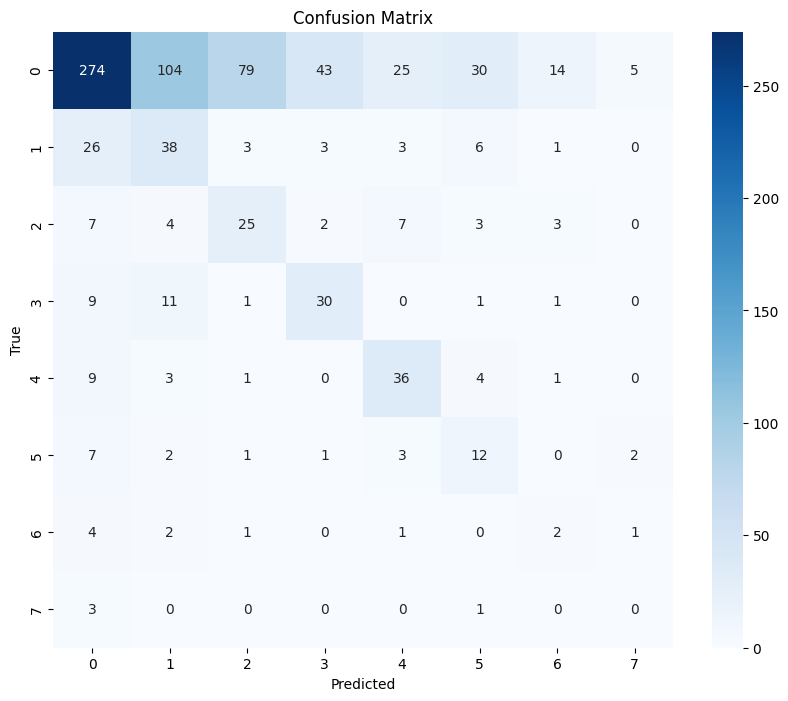

In [18]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.feature_extraction.text import TfidfVectorizer
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
# import seaborn as sns
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.callbacks import EarlyStopping, Callback
# import matplotlib.pyplot as plt

# # Transformasi teks menggunakan TF-IDF
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
# X_test_tfidf = vectorizer.transform(X_test).toarray()

# # Mengatasi ketidakseimbangan data dengan SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# # Mengonversi data ke tensor untuk digunakan dalam model Keras
# X_train_res_tensor = tf.convert_to_tensor(X_train_res, dtype=tf.float32)
# X_test_tensor = tf.convert_to_tensor(X_test_tfidf, dtype=tf.float32)
# y_train_res_tensor = tf.convert_to_tensor(y_train_res, dtype=tf.int32)
# y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

# # Membangun model
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_res_tensor.shape[1],)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(8, activation='softmax')
# ])

# # Mengompilasi model dengan metrik balanced accuracy dan learning rate yang disesuaikan
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
#               loss='sparse_categorical_crossentropy', 
#               metrics=[BalancedAccuracy()])

# # Gunakan early stopping
# early_stopping = EarlyStopping(monitor='val_balanced_accuracy', mode='max', patience=5, restore_best_weights=True)

# # Latih model dengan class weights dan early stopping
# history = model.fit(X_train_res_tensor, y_train_res_tensor, epochs=50, batch_size=32, 
#                     validation_data=(X_test_tensor, y_test_tensor), 
#                     class_weight=class_weights_dict,
#                     callbacks=[early_stopping])

# # Evaluasi model
# y_pred = model.predict(X_test_tensor)
# y_pred_classes = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred_classes))import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.feature_extraction.text import TfidfVectorizer
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
# import seaborn as sns
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.callbacks import EarlyStopping, Callback
# import matplotlib.pyplot as plt

# # Transformasi teks menggunakan TF-IDF
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
# X_test_tfidf = vectorizer.transform(X_test).toarray()

# # Mengatasi ketidakseimbangan data dengan SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# # Mengonversi data ke tensor untuk digunakan dalam model Keras
# X_train_res_tensor = tf.convert_to_tensor(X_train_res, dtype=tf.float32)
# X_test_tensor = tf.convert_to_tensor(X_test_tfidf, dtype=tf.float32)
# y_train_res_tensor = tf.convert_to_tensor(y_train_res, dtype=tf.int32)
# y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

# # Membangun model
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_res_tensor.shape[1],)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(8, activation='softmax')
# ])

# # Balanced accuracy callback
# class BalancedAccuracyCallback(Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         y_pred = self.model.predict(X_test_tensor)
#         y_pred_classes = np.argmax(y_pred, axis=1)
#         balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)
#         print(f'Balanced Accuracy: {balanced_acc:.2f}')
#         logs['val_balanced_accuracy'] = balanced_acc

# # Mengompilasi model
# model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-4), 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])

# # Gunakan early stopping
# early_stopping = EarlyStopping(monitor='val_balanced_accuracy', mode='max', patience=5, restore_best_weights=True)

# # Latih model dengan class weights dan early stopping
# history = model.fit(X_train_res_tensor, y_train_res_tensor, epochs=50, batch_size=32, 
#                     validation_data=(X_test_tensor, y_test_tensor), 
#                     class_weight=class_weights_dict,
#                     callbacks=[early_stopping, BalancedAccuracyCallback()])

# # Evaluasi model
# y_pred = model.predict(X_test_tensor)
# y_pred_classes = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred_classes))

# balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)
# print("Balanced Accuracy: {:.2f}".format(balanced_acc))

# conf_matrix = confusion_matrix(y_test, y_pred_classes)
# print("Confusion Matrix:\n", conf_matrix)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


# balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)
# print("Balanced Accuracy: {:.2f}".format(balanced_acc))

# conf_matrix = confusion_matrix(y_test, y_pred_classes)
# print("Confusion Matrix:\n", conf_matrix)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.stemmed_text,
    df.label_angka,
    test_size=0.2,
    random_state=42,
    stratify=df.label_angka
)

              precision    recall  f1-score   support

           0       0.80      0.65      0.71       574
           1       0.33      0.44      0.37        80
           2       0.18      0.35      0.24        52
           3       0.31      0.42      0.35        53
           4       0.42      0.51      0.46        55
           5       0.21      0.21      0.21        28
           6       0.14      0.17      0.15        12
           7       0.00      0.00      0.00         4

    accuracy                           0.56       858
   macro avg       0.30      0.34      0.31       858
weighted avg       0.63      0.56      0.59       858

Balanced Accuracy: 0.34


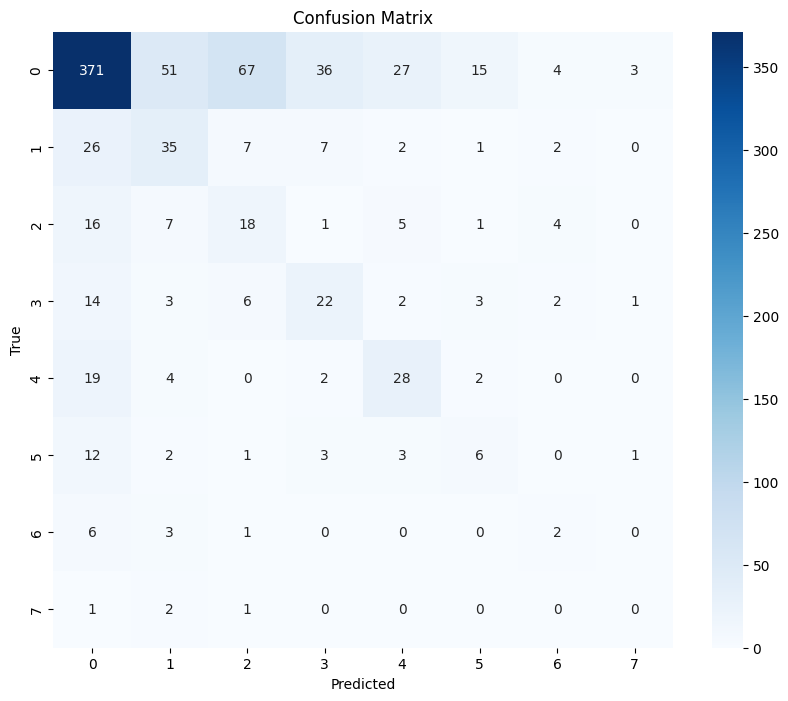

In [9]:

import gensim
from gensim.models import Word2Vec
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

word2vec_model_path = "C:\\Users\\thebl\\Documents\\DataScience\\idwiki_word2vec_300\\idwiki_word2vec_300.model"
word2vec_model = Word2Vec.load(word2vec_model_path)

# Mengubah kalimat menjadi representasi vektor rata-rata dengan ID-Word2Vec
def tweet_to_avg_vector(tweet, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in tweet.split():
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Membuat representasi vektor untuk contoh tweet menggunakan ID-Word2Vec
def tweets_to_vectors(tweets, model):
    return np.array([tweet_to_avg_vector(tweet, model) for tweet in tweets])

# Mengubah teks menjadi vektor rata-rata dengan ID-Word2Vec
X_train_vectors = tweets_to_vectors(X_train, word2vec_model)
X_test_vectors = tweets_to_vectors(X_test, word2vec_model)

# Inisialisasi dan training model SVM
svm_classifier = SVC(kernel='linear', random_state=42)

# Definisikan pipeline dengan SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', svm_classifier)
])

# Fit model dengan pipeline
pipeline.fit(X_train_vectors, y_train)

# Prediksi menggunakan model
y_pred = pipeline.predict(X_test_vectors)

# Evaluasi hasil
print(classification_report(y_test, y_pred))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       574
           1       0.38      0.29      0.33        80
           2       0.55      0.23      0.32        52
           3       0.60      0.28      0.38        53
           4       0.46      0.53      0.49        55
           5       0.50      0.14      0.22        28
           6       1.00      0.08      0.15        12
           7       0.00      0.00      0.00         4

    accuracy                           0.69       858
   macro avg       0.53      0.31      0.34       858
weighted avg       0.67      0.69      0.66       858

Balanced Accuracy: 0.31


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

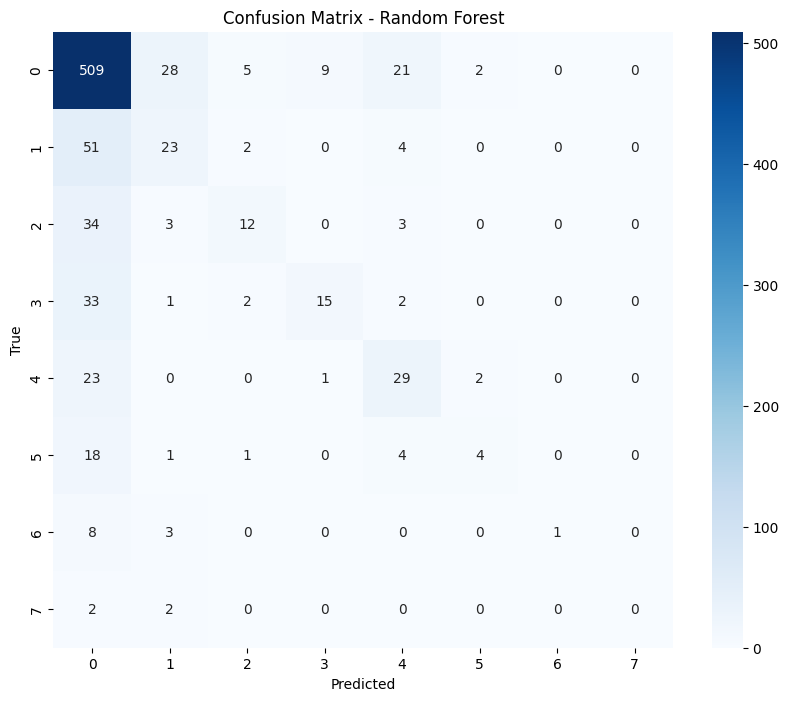

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan training model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Definisikan pipeline dengan SMOTE
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', rf_classifier)
])

# Fit model dengan pipeline
pipeline_rf.fit(X_train_vectors, y_train)

# Prediksi menggunakan model Random Forest
y_pred_rf = pipeline_rf.predict(X_test_vectors)

# Evaluasi hasil
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred_rf)))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       574
           1       0.31      0.44      0.36        80
           2       0.27      0.25      0.26        51
           3       0.35      0.43      0.39        53
           4       0.47      0.52      0.50        54
           5       0.25      0.39      0.31        28
           6       0.11      0.18      0.13        11
           7       0.00      0.00      0.00         4

    accuracy                           0.60       855
   macro avg       0.32      0.36      0.34       855
weighted avg       0.64      0.60      0.62       855

Balanced Accuracy: 0.36


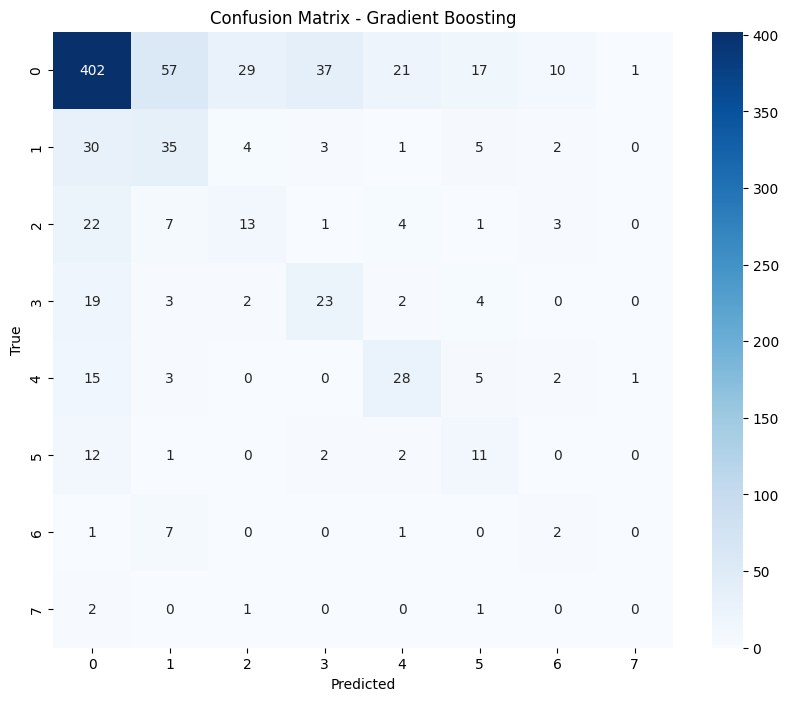

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi dan training model Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Definisikan pipeline dengan SMOTE
pipeline_gb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('gb', gb_classifier)
])

# Fit model dengan pipeline
pipeline_gb.fit(X_train_vectors, y_train)

# Prediksi menggunakan model Gradient Boosting
y_pred_gb = pipeline_gb.predict(X_test_vectors)

# Evaluasi hasil
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred_gb)))

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.83      0.49      0.62       574
           1       0.28      0.42      0.34        80
           2       0.16      0.40      0.23        52
           3       0.25      0.43      0.32        53
           4       0.35      0.51      0.41        55
           5       0.09      0.18      0.12        28
           6       0.11      0.25      0.15        12
           7       0.00      0.00      0.00         4

    accuracy                           0.46       858
   macro avg       0.26      0.34      0.27       858
weighted avg       0.63      0.46      0.51       858

Balanced Accuracy: 0.34


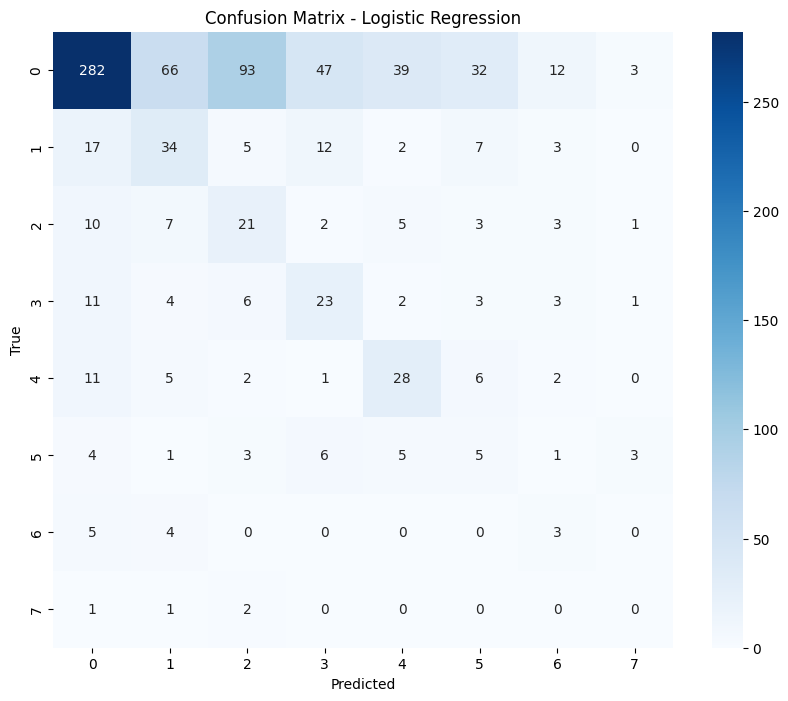

In [11]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi dan training model Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Definisikan pipeline dengan SMOTE
pipeline_logreg = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', logreg_classifier)
])

# Fit model dengan pipeline
pipeline_logreg.fit(X_train_vectors, y_train)

# Prediksi menggunakan model Logistic Regression
y_pred_logreg = pipeline_logreg.predict(X_test_vectors)

# Evaluasi hasil
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_logreg))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred_logreg)))

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Tuned Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.90      0.39      0.55       574
           1       0.29      0.46      0.36        80
           2       0.20      0.51      0.28        51
           3       0.35      0.70      0.47        53
           4       0.43      0.67      0.52        54
           5       0.19      0.50      0.28        28
           6       0.12      0.55      0.19        11
           7       0.06      0.50      0.11         4

    accuracy                           0.45       855
   macro avg       0.32      0.53      0.35       855
weighted avg       0.70      0.45      0.49       855

Balanced Accuracy: 0.53


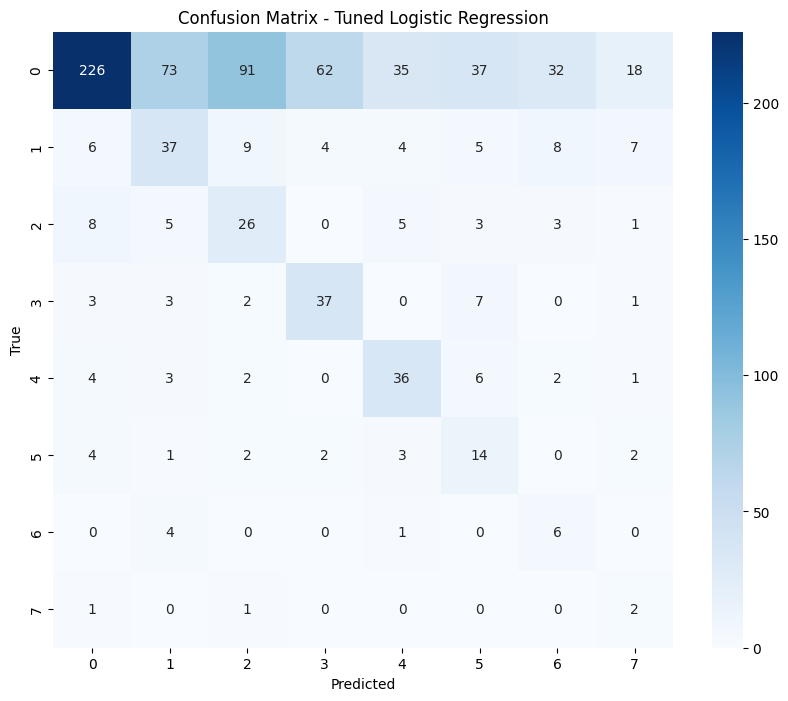

Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


In [30]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Definisi pipeline dengan SMOTE
pipeline_logreg = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', logreg_classifier)
])

# Parameter grid untuk Grid Search
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'logreg__penalty': ['l1', 'l2'],  # Type of regularization
    'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Solver algorithm
}

# Inisialisasi Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=pipeline_logreg, param_grid=param_grid, cv=5, scoring='balanced_accuracy')

# Melakukan fitting Grid Search pada data
grid_search.fit(X_train_vectors, y_train)

# Mendapatkan model terbaik setelah Grid Search
best_model = grid_search.best_estimator_

# Prediksi menggunakan model terbaik
y_pred_logreg_tuned = best_model.predict(X_test_vectors)

# Evaluasi hasil setelah tuning
print("Tuned Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_logreg_tuned))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred_logreg_tuned)))

# Plot confusion matrix
conf_matrix_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logreg_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()

# Print best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.89      0.43      0.58       574
           1       0.33      0.41      0.37        80
           2       0.17      0.40      0.24        52
           3       0.32      0.60      0.42        53
           4       0.37      0.67      0.48        55
           5       0.18      0.50      0.27        28
           6       0.10      0.42      0.16        12
           7       0.03      0.25      0.05         4

    accuracy                           0.45       858
   macro avg       0.30      0.46      0.32       858
weighted avg       0.69      0.45      0.50       858

Balanced Accuracy: 0.46


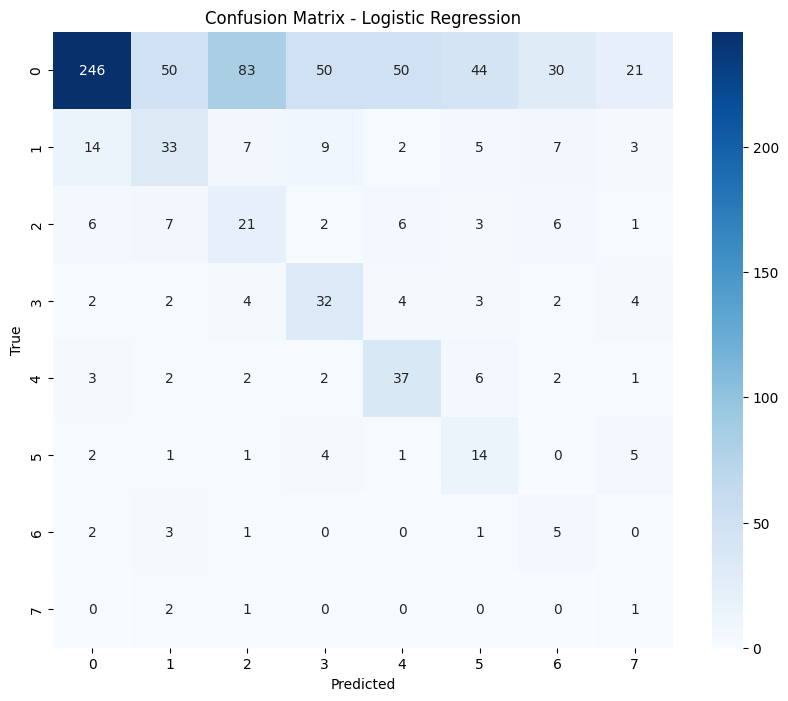

In [12]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline  # Gunakan Pipeline dari imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter terbaik dari tuning hyperparameter
best_params = {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

# Inisialisasi dan training model Logistic Regression dengan parameter terbaik
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42, **best_params)

# Definisikan pipeline dengan SMOTE
pipeline_logreg = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', logreg_classifier)
])

# Fit model dengan pipeline
pipeline_logreg.fit(X_train_vectors, y_train)

# Prediksi menggunakan model Logistic Regression
y_pred_logreg = pipeline_logreg.predict(X_test_vectors)

# Evaluasi hasil
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_logreg))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred_logreg)))

# Buat confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
